In [2]:
# Essential Libraries
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler

# Algorithms
from minisom import MiniSom
import seaborn as sb


## Merging the cluster CSV together with the macroindicator files 

In [3]:
indicator = pd.read_csv('clean_macro_indicators.csv')

clean_indicator = indicator.iloc[: , 2:] #dropping the first two columns 
clean_indicator = clean_indicator.drop(columns = 'Clusters')
clean_indicator 

,Country,Current account balance_Percent of GDP_average,Current account balance_U.S. dollars_average,General government gross debt_National currency_average,General government gross debt_Percent of GDP_average,General government net lending/borrowing_National currency_average,General government net lending/borrowing_Percent of GDP_average,General government primary net lending/borrowing_National currency_average,General government primary net lending/borrowing_Percent of GDP_average,General government revenue_National currency_average,...,"Inflation, average consumer prices_Index_average","Inflation, average consumer prices_Percent change_average","Inflation, end of period consumer prices_Index_average","Inflation, end of period consumer prices_Percent change_average",Population_Persons_average,Total investment_Percent of GDP_average,Volume of Imports of goods_Percent change_average,Volume of exports of goods_Percent change_average,Volume of exports of goods and services_Percent change_average,Volume of imports of goods and services_Percent change_average
0,Afghanistan,11.835909,2.145909,89.843455,7.641909,-7.009818,-0.500818,-6.345818,-0.443727,303.451455,...,101.474364,4.519727,104.329545,4.676000,28.506091,21.044818,6.558636,6.359818,-0.353636,5.683727
1,Albania,-9.221545,-1.204727,1004.166000,68.678545,-49.200182,-3.431818,-10.973727,-0.759818,385.045182,...,99.790364,2.074727,100.343727,1.827727,2.889545,26.692636,1.017545,11.164909,2.373273,-0.278182
2,Algeria,-5.366545,-8.456909,4019.570000,21.726727,-1031.824364,-5.762636,-1085.274545,-6.100182,5802.941818,...,175.315273,4.446273,178.105818,4.384091,40.031818,44.868818,0.101091,-2.320455,-1.582636,-0.726000
3,Angola,3.407545,3.497091,14432.921818,64.685273,-140.509727,-0.297000,516.285727,2.438909,4693.868182,...,205.173091,16.637364,222.155545,17.128000,26.831636,26.123545,-5.699000,-2.404273,-2.487818,-7.688818
4,Argentina,-1.905909,-11.160364,7261.532636,59.130000,-565.051091,-4.770364,-324.397727,-2.929545,3172.959000,...,224.552889,24.551625,244.983300,25.394333,43.113091,17.233273,2.792455,0.228455,0.226455,2.797545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,United Arab Emirates,9.572636,36.517727,295.652818,21.577636,18.725545,1.288182,22.521273,1.565455,445.256273,...,262.240909,1.143818,260.333909,1.206727,8.923727,23.519455,2.409182,3.593636,4.515727,2.492091
123,United Kingdom,-3.900364,-108.558455,1651.048182,85.720273,-106.346182,-5.696000,-72.982091,-3.917545,694.982909,...,100.352182,2.101727,101.056182,2.014636,65.051364,17.136636,1.615273,1.467091,1.363818,1.598182
124,Uruguay,-1.023444,-0.611778,879.096182,53.883000,-37.693273,-2.143000,-1.683364,0.117364,430.441818,...,149.778364,8.191818,153.277273,8.185545,3.466000,16.824455,-3.209000,-1.838125,-4.752500,-3.051500
125,Uzbekistan,0.183273,0.224727,53653.109091,13.670727,1259.861273,1.608000,903.032182,1.495000,71206.177273,...,183.455727,12.136273,194.411000,12.179455,31.064000,31.053818,8.606273,3.707727,3.904091,8.647636


In [4]:
cluster_df = pd.read_csv('final_countries_cluster.csv')
cluster_df

,Country/Territory,Region,cluster
0,Afghanistan,Middle East and North Africa,6
1,Albania,Europe,5
2,Algeria,Middle East and North Africa,5
3,Andorra,Europe,5
4,Angola,Africa,2
...,...,...,...
164,Uruguay,South and Central America,5
165,Uzbekistan,Europe,3
166,Vanuatu,Western Pacific,1
167,Zambia,Africa,3


In [5]:
cluster_df = pd.read_csv('final_countries_cluster.csv')
hdi = pd.read_csv('hdi.csv')
hdi_breakdown = pd.read_csv('clean edu.csv')

final_df = pd.merge(clean_indicator, cluster_df, left_on='Country', right_on='Country/Territory')
god_df = pd.merge(final_df, hdi, on='Country')
imba_df = pd.merge(god_df, hdi_breakdown, on='Country')
imba_df = imba_df.drop(columns=['Country/Territory'])
imba_df

,Country,Current account balance_Percent of GDP_average,Current account balance_U.S. dollars_average,General government gross debt_National currency_average,General government gross debt_Percent of GDP_average,General government net lending/borrowing_National currency_average,General government net lending/borrowing_Percent of GDP_average,General government primary net lending/borrowing_National currency_average,General government primary net lending/borrowing_Percent of GDP_average,General government revenue_National currency_average,...,Population_Persons_average,Total investment_Percent of GDP_average,Volume of Imports of goods_Percent change_average,Volume of exports of goods_Percent change_average,Volume of exports of goods and services_Percent change_average,Volume of imports of goods and services_Percent change_average,Region,cluster,HDI_Average,Education Index_average
0,Afghanistan,11.835909,2.145909,89.843455,7.641909,-7.009818,-0.500818,-6.345818,-0.443727,303.451455,...,28.506091,21.044818,6.558636,6.359818,-0.353636,5.683727,Middle East and North Africa,6,0.4962,0.3983
1,Albania,-9.221545,-1.204727,1004.166000,68.678545,-49.200182,-3.431818,-10.973727,-0.759818,385.045182,...,2.889545,26.692636,1.017545,11.164909,2.373273,-0.278182,Europe,5,0.7806,0.7365
2,Algeria,-5.366545,-8.456909,4019.570000,21.726727,-1031.824364,-5.762636,-1085.274545,-6.100182,5802.941818,...,40.031818,44.868818,0.101091,-2.320455,-1.582636,-0.726000,Middle East and North Africa,5,0.7364,0.6524
3,Angola,3.407545,3.497091,14432.921818,64.685273,-140.509727,-0.297000,516.285727,2.438909,4693.868182,...,26.831636,26.123545,-5.699000,-2.404273,-2.487818,-7.688818,Africa,2,0.5609,0.4620
4,Argentina,-1.905909,-11.160364,7261.532636,59.130000,-565.051091,-4.770364,-324.397727,-2.929545,3172.959000,...,43.113091,17.233273,2.792455,0.228455,0.226455,2.797545,South and Central America,3,0.8378,0.8317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,United Arab Emirates,9.572636,36.517727,295.652818,21.577636,18.725545,1.288182,22.521273,1.565455,445.256273,...,8.923727,23.519455,2.409182,3.593636,4.515727,2.492091,Middle East and North Africa,4,0.8546,0.7307
123,United Kingdom,-3.900364,-108.558455,1651.048182,85.720273,-106.346182,-5.696000,-72.982091,-3.917545,694.982909,...,65.051364,17.136636,1.615273,1.467091,1.363818,1.598182,Europe,3,0.9201,0.9047
124,Uruguay,-1.023444,-0.611778,879.096182,53.883000,-37.693273,-2.143000,-1.683364,0.117364,430.441818,...,3.466000,16.824455,-3.209000,-1.838125,-4.752500,-3.051500,South and Central America,5,0.8030,0.7410
125,Uzbekistan,0.183273,0.224727,53653.109091,13.670727,1259.861273,1.608000,903.032182,1.495000,71206.177273,...,31.064000,31.053818,8.606273,3.707727,3.904091,8.647636,Europe,3,0.6974,0.7040


## Saving the merged file containing the various cluster and macroindicators

In [6]:
imba_df.to_csv('merged_clusters_indicators.csv', index=False)

## Visualization of the marcroindicators 

<AxesSubplot:xlabel='count', ylabel='cluster'>

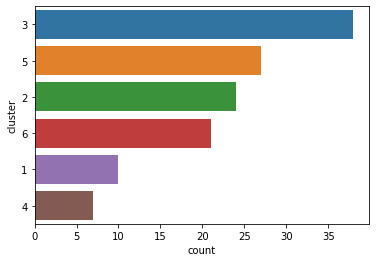

In [3]:
imba_df = pd.read_csv('merged_clusters_indicators.csv')
sb.countplot(y="cluster", data=imba_df,
            order = imba_df['cluster'].value_counts().index)



From the distribution of the number of counts in each cluster, we observe that there is an uneven representation in each cluster. 

Therefore, we will need to upsample the clusters later on before we use a classification machine learning to predict the classes using the predictors. 

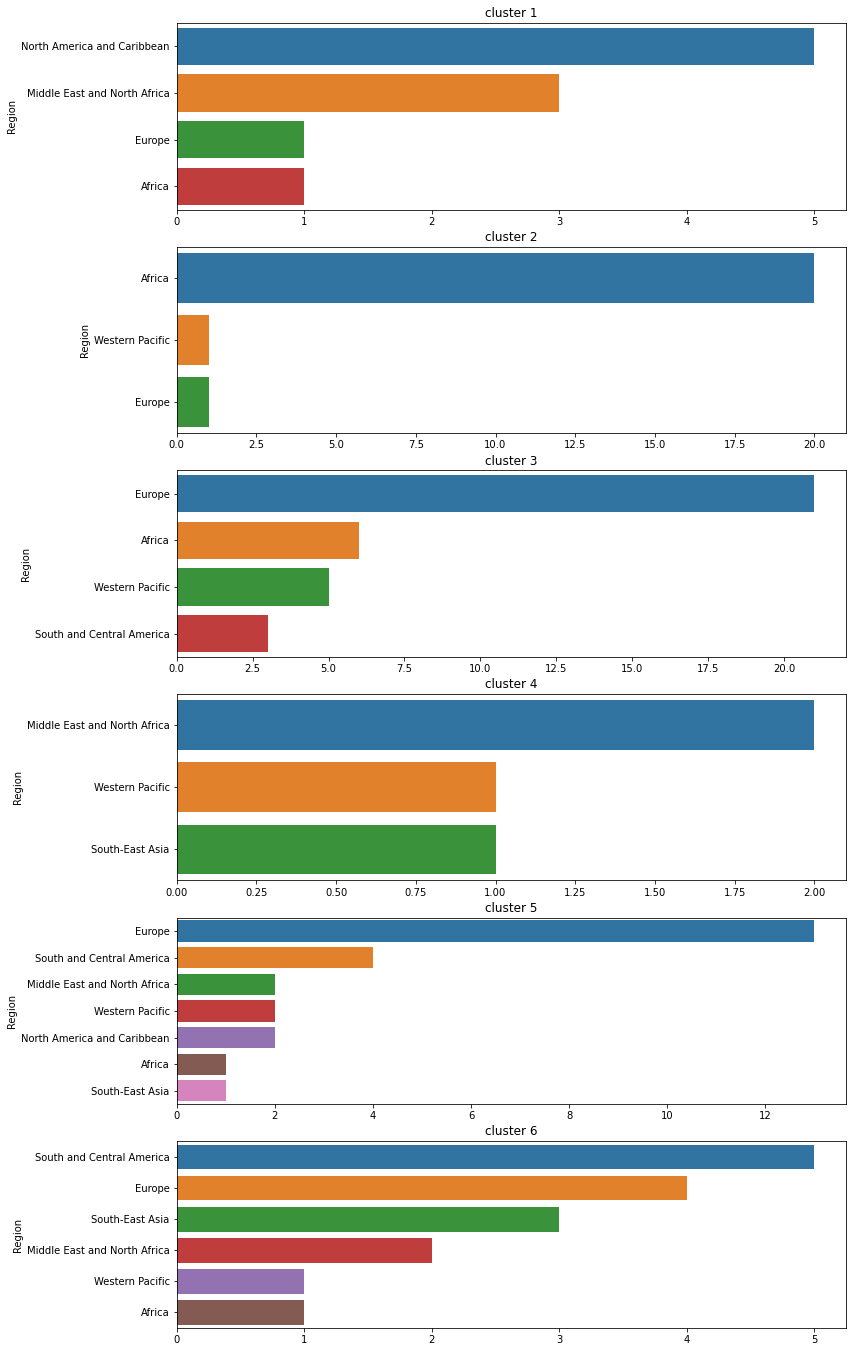

In [8]:
clusters_unique = imba_df['cluster'].unique()
clusters_unique = np.sort(clusters_unique)
f, axes = plt.subplots(len(clusters_unique), 1, figsize=(12, 24))
count=0
for i in clusters_unique:
    df_cluster = imba_df[imba_df['cluster'] == i]
    a = str(i)
    a = 'cluster ' + a
    df_cluster
    axes[count].set_title(a)
    sb.countplot(y="Region", data=df_cluster,
               order = df_cluster['Region'].value_counts().index, 
                ax = axes[count]).set(xlabel = None)
    count += 1

In [9]:
imba_df.dtypes

Country                                                                                                           object
Current account balance_Percent of GDP_average                                                                   float64
Current account balance_U.S. dollars_average                                                                     float64
General government gross debt_National currency_average                                                          float64
General government gross debt_Percent of GDP_average                                                             float64
General government net lending/borrowing_National currency_average                                               float64
General government net lending/borrowing_Percent of GDP_average                                                  float64
General government primary net lending/borrowing_National currency_average                                       float64
General government primary net l

Looking at the various macroindicators, we realised some of the indicators represents the same indicator but using a different format. 

> Eg. Current account balance is represented using "percent of GDP" and "national currency". Hence to standardize, those indicators with similar representations, we will be using "percent of GDP" as the macroindicators as the basis of comparison since the national currency value of every country is different. 

Furthermore, GDP for each country can be represented in many ways.
> Eg. It was represented as "GDP per capita" or "GDP in national currency". To standardize, we will be using GDP per capita in USD as a common basis of comparison across all countries 

In [4]:
X = imba_df[['Current account balance_Percent of GDP_average',
                    'General government net lending/borrowing_Percent of GDP_average',
                   'General government revenue_Percent of GDP_average', 
                   'General government total expenditure_Percent of GDP_average', 
                    'Gross domestic product per capita, current prices_U.S. dollars_average',
                    'Inflation, average consumer prices_Percent change_average',
                    'Population_Persons_average',
                     'Total investment_Percent of GDP_average',
                    'Gross national savings_Percent of GDP_average', 
                     'HDI_Average',  'Education Index_average']]
y = imba_df['cluster']

C:\Users\brndk\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\brndk\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\brndk\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\brndk\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\brndk\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.5% of the points 

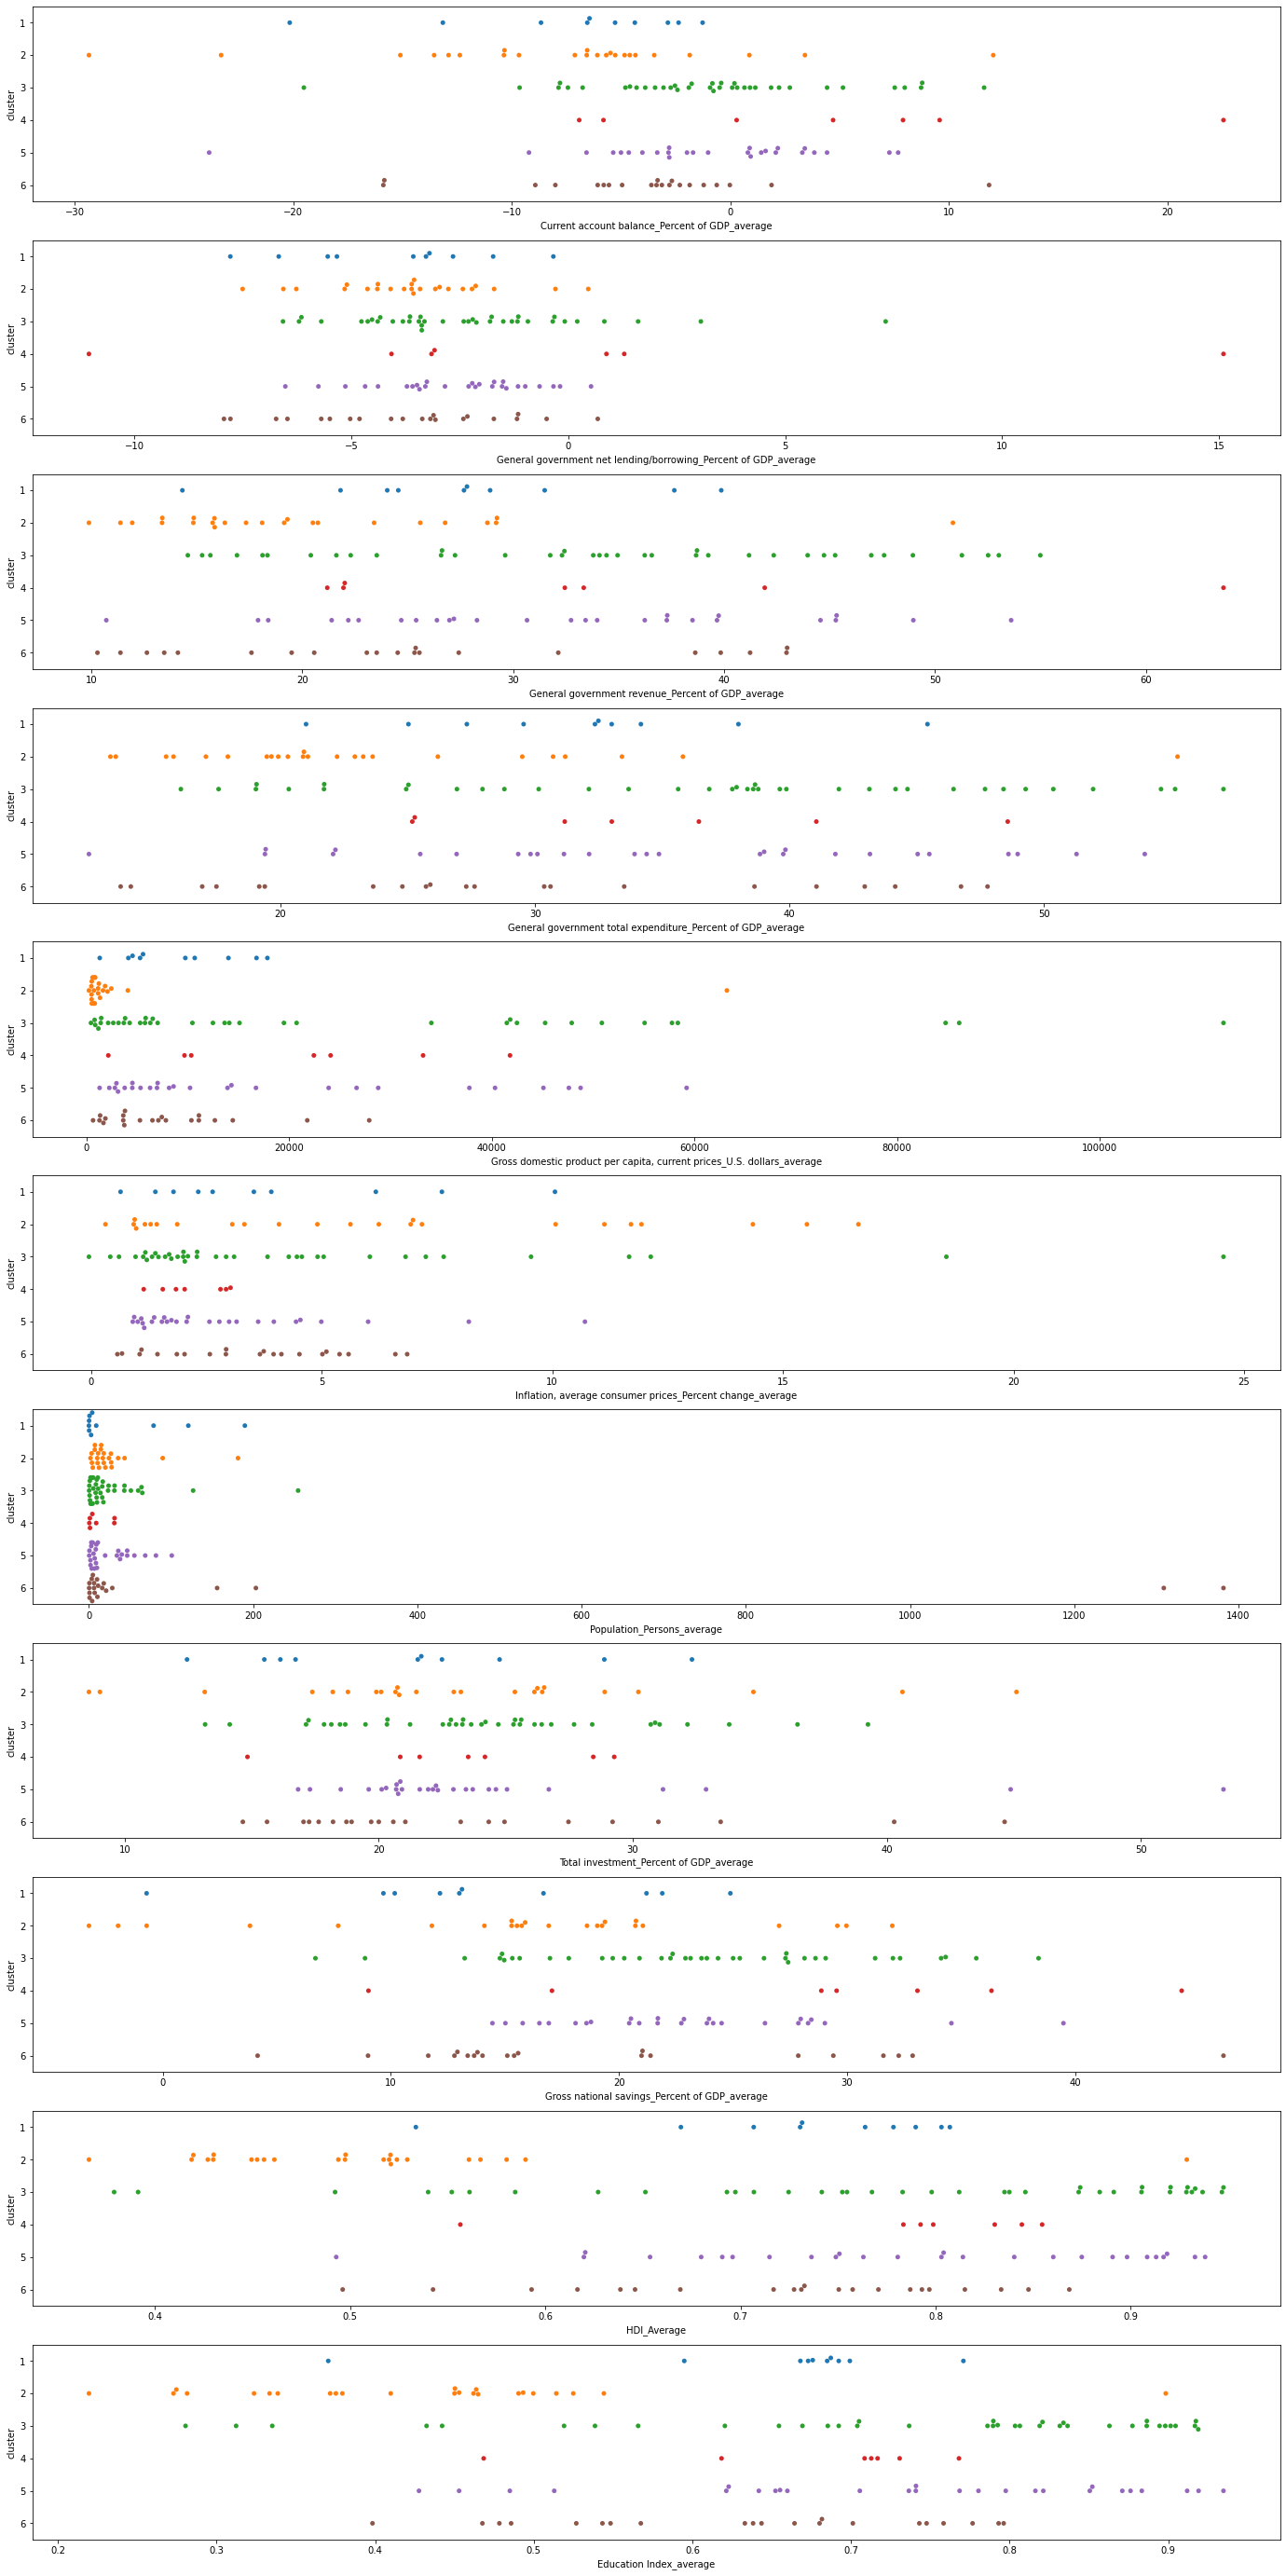

In [5]:
f, axes = plt.subplots(len(X.columns), 1, figsize=(24, 50))

count = 0
for var in X:
    sb.swarmplot(x = var, y = "cluster", data = imba_df, orient = "h", ax = axes[count])
    count += 1

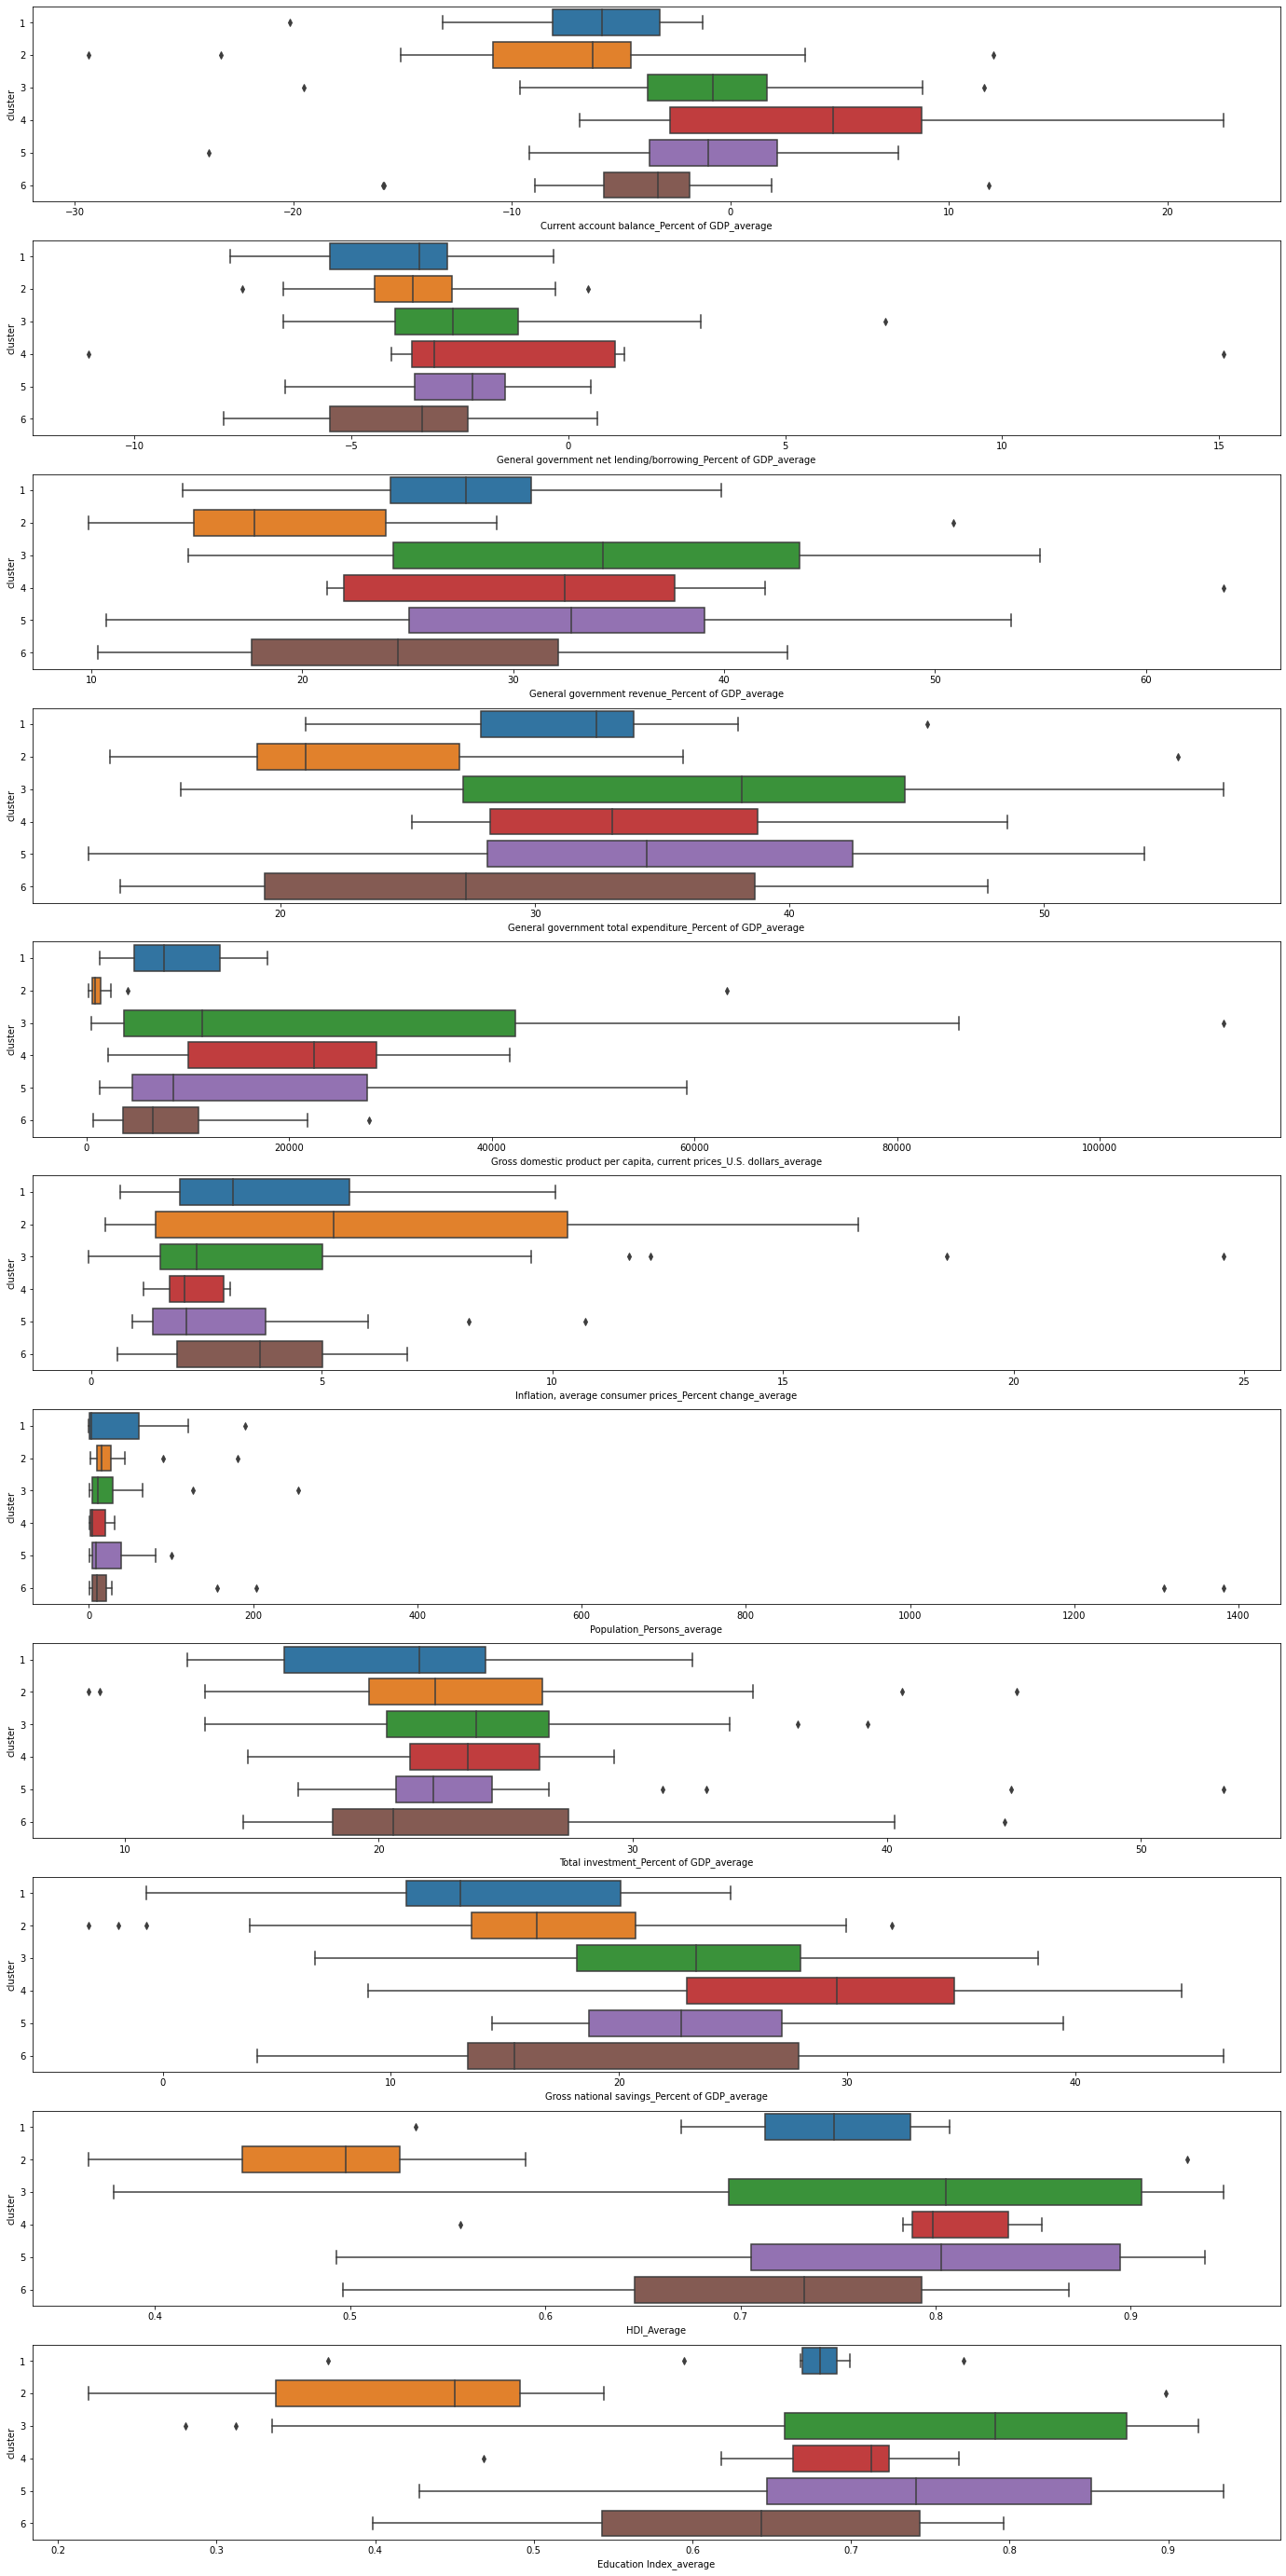

In [19]:
f, axes = plt.subplots(len(X.columns), 1, figsize=(24, 50))

count = 0
for var in X:
    sb.boxplot(x = var, y = "cluster", data = imba_df, orient = "h", ax = axes[count])
    count += 1

From the boxplot and swarmplots, we observe that the different clusters have different distribution for each of the macroindicators. This is mainly - (1) current account balance, (2) GDP per capita, (3) education index 

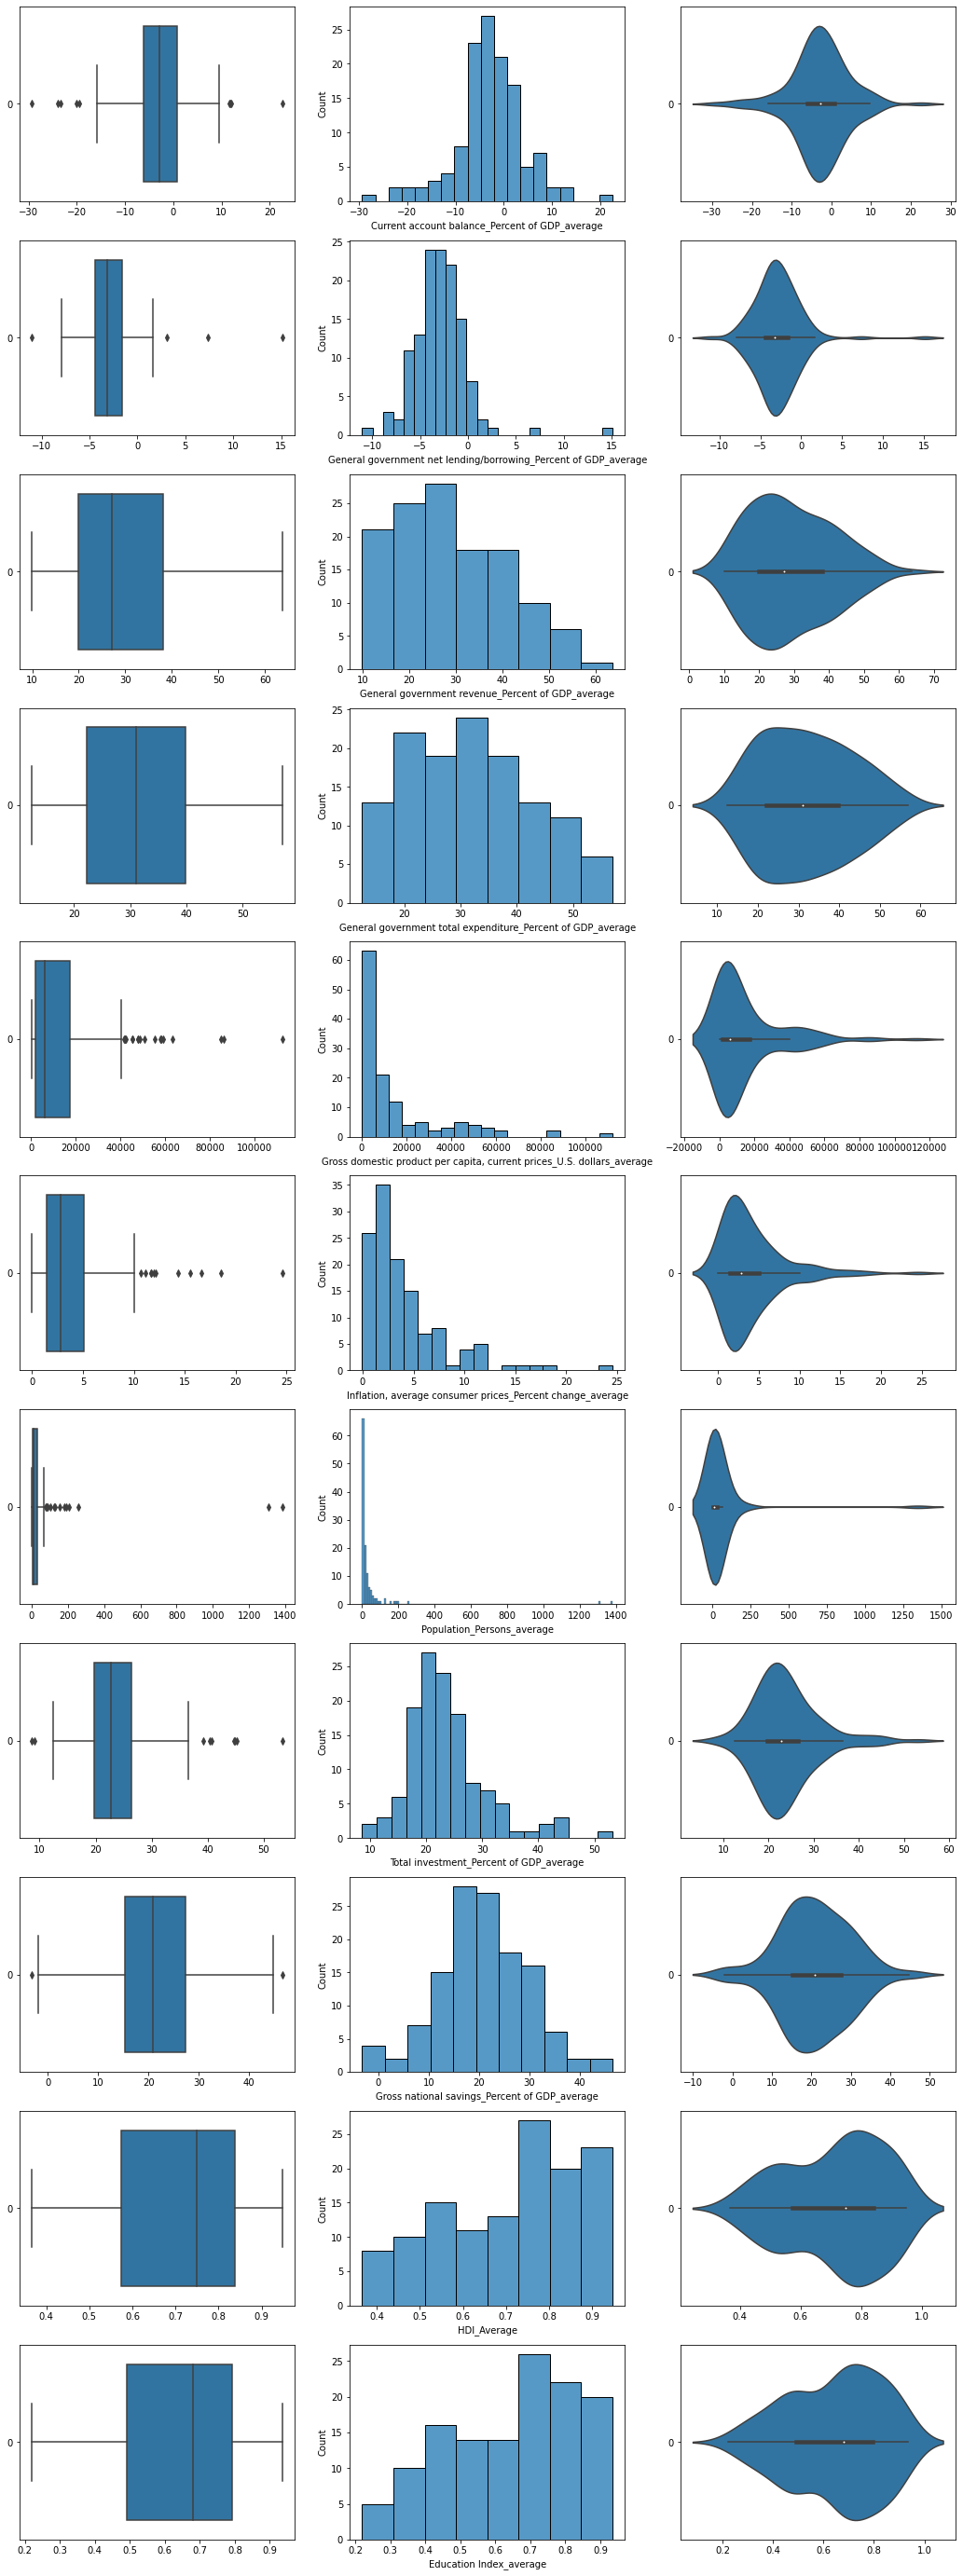

In [20]:
# Draw the distributions of all Predictors
f, axes = plt.subplots(len(X.columns), 3, figsize=(18, 50))

count = 0
for var in X:
    sb.boxplot(data = X[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = X[var], ax = axes[count,1])
    sb.violinplot(data = X[var], orient = "h", ax = axes[count,2])
    count += 1

Most of the macroindicators have a normal distribution, except for Population where it is very skewed to the right. 

AxesSubplot(0.125,0.125;0.775x0.755)


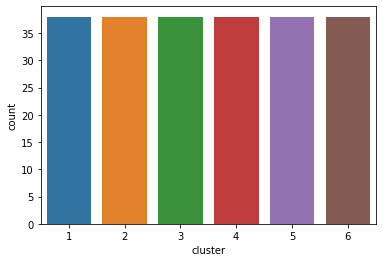

In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

y = pd.DataFrame(imba_df['cluster'].astype('category')) 
#nice way to convert the datatypes to be used for visualization 

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
print (sb.countplot(x="cluster", data=y_sm))


SMOTE below upsamples all the classes to the same value as the majority class. In this case, cluster 1 = 40 so all clusters will be upsampled to 40. 

How the upsampling works: 

SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors. (k=5 by default) 

In [22]:
# saving the smote files
X_sm.to_csv('final_X_smote.csv', index=False)
y_sm.to_csv('final_y_smote.csv', index=False)

## Random forest modelling

In [23]:
X_sm = pd.read_csv('final_X_smote.csv')
y_sm = pd.read_csv('final_y_smote.csv')


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2)
X_train1 = X_train.iloc[: , :-1]
X_test1 = X_test.iloc[:, :-1]

def random_tree (X_train, X_test, y_train, y_test):     
    rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                     max_depth = 3)       # set the maximum depth of each tree
    
    # Fit Random Forest on Train Data
    
    rforest.fit(X_train, y_train.values.ravel())
    
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print('Goodness of Fit of Model = \t', rforest.score(X_train, y_train))
    print()
    
    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print('Goodness of Fit of Model = \t', rforest.score(X_test, y_test))
    print ()
    
    y_train_pred = rforest.predict(X_train)
    y_test_pred = rforest.predict(X_test)
    
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred),
                annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
                annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
    
    importances = rforest.feature_importances_
    features = []
    for i in range(len(X_train.columns)):
        features.append(i)
        
    forest_importances = pd.DataFrame({'features':features, 'values':importances})
    forest_importances.sort_values(by='values',ascending=True,inplace=True)

    return forest_importances

In [26]:
X_train.to_csv('final_X_train.csv', index = False)
X_test.to_csv('final_X_test.csv', index = False)
y_train.to_csv('final_y_train.csv', index = False)
y_test.to_csv('final_y_test.csv', index = False)

Goodness of Fit of Model 	Train Dataset
Goodness of Fit of Model = 	 0.6978021978021978

Goodness of Fit of Model 	Test Dataset
Goodness of Fit of Model = 	 0.5652173913043478



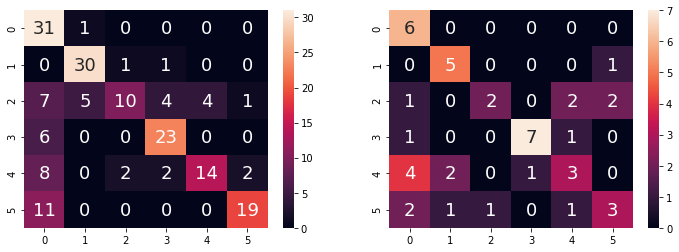

In [27]:
forest = random_tree(X_train1, X_test1, y_train, y_test)

0 	 Current account balance_Percent of GDP_average
1 	 General government net lending/borrowing_Percent of GDP_average
2 	 General government revenue_Percent of GDP_average
3 	 General government total expenditure_Percent of GDP_average
4 	 Gross domestic product per capita, current prices_U.S. dollars_average
5 	 Inflation, average consumer prices_Percent change_average
6 	 Population_Persons_average
7 	 Total investment_Percent of GDP_average
8 	 Gross national savings_Percent of GDP_average
9 	 HDI_Average


<AxesSubplot:xlabel='values', ylabel='features'>

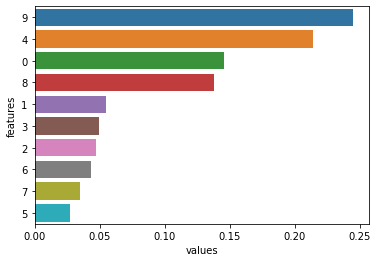

In [28]:
for i in range(len(X_train1.columns)):
        print (i, '\t', X_train1.columns[i])

sb.barplot(y="features", x="values", 
               data=forest, 
               orient='h', 
              order = forest.sort_values(by ='values', ascending = False).features)

Top 4 Main features that is used to classify the classes seems to be 

1) HDI

2) GDP per capita

3) Current account balance 

4) Gross national savings 


Since HDI made up of 
1) GDP per capita

2) life expectancy

3) Education standards 

However, upon research, we realised that diabetes negatively influence life expectancy rather than life expectancy affecting diabetes. 
https://www.webmd.com/diabetes/news/20101201/diabetes-cuts-years-off-life-span-of-americans.

Therefore, we will breakdown HDI to GDP per capita and education index first and rerun and optimize our random forest model

In [29]:
X_train = pd.read_csv('final_X_train.csv')
X_test = pd.read_csv('final_X_test.csv')
y_train = pd.read_csv('final_y_train.csv')
y_test = pd.read_csv('final_y_test.csv')

Goodness of Fit of Model 	Train Dataset
Goodness of Fit of Model = 	 0.7362637362637363

Goodness of Fit of Model 	Test Dataset
Goodness of Fit of Model = 	 0.5869565217391305



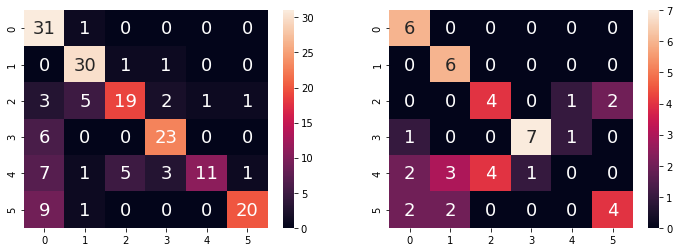

In [31]:
X_train2 = X_train.drop(columns = X_train.columns[-2])
X_test2 = X_test.drop(columns = X_train.columns[-2])
forest1 = random_tree(X_train2, X_test2, y_train, y_test)

0 	 Current account balance_Percent of GDP_average
1 	 General government net lending/borrowing_Percent of GDP_average
2 	 General government revenue_Percent of GDP_average
3 	 General government total expenditure_Percent of GDP_average
4 	 Gross domestic product per capita, current prices_U.S. dollars_average
5 	 Inflation, average consumer prices_Percent change_average
6 	 Population_Persons_average
7 	 Total investment_Percent of GDP_average
8 	 Gross national savings_Percent of GDP_average
9 	 Education Index_average


<AxesSubplot:xlabel='values', ylabel='features'>

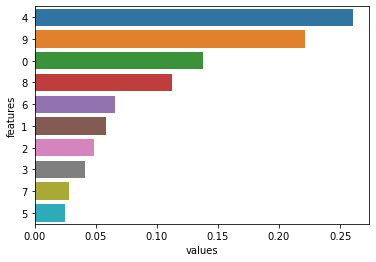

In [32]:
for i in range(len(X_train2.columns)):
        print (i, '\t', X_train2.columns[i])

sb.barplot(y="features", x="values", 
               data=forest1, 
               orient='h', 
              order = forest1.sort_values(by ='values', ascending = False).features)

Still see that HDI is the best feature so far. 

In [33]:
from sklearn.model_selection import GridSearchCV
def rf_tuning(X_train, X_test, y_train, y_test):

    # Define the Hyper-parameter Grid to search on, in case of Random Forest
    param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
                  'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10\

    # Create the Hyper-parameter Grid
    hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')        # score to evaluate
    # Train the models using Cross-Validation
    return hpGrid.fit(X_train, y_train.values.ravel())


In [34]:
grid = rf_tuning(X_train2, X_test2, y_train, y_test)


In [35]:
print (grid.best_estimator_)
print (np.abs(grid.best_score_))

RandomForestClassifier(max_depth=9, n_estimators=500)
0.6873873873873872


In [36]:
def random_tree_new (X_train, X_test, y_train, y_test):     
    rforest = RandomForestClassifier(n_estimators = 500,  # n_estimators denote number of trees
                                     max_depth = 9)       # set the maximum depth of each tree
    
    # Fit Random Forest on Train Data
    
    rforest.fit(X_train, y_train.values.ravel())
    
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print('Goodness of Fit of Model = \t', rforest.score(X_train, y_train))
    print()
    
    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print('Goodness of Fit of Model = \t', rforest.score(X_test, y_test))
    print ()
    
    y_train_pred = rforest.predict(X_train)
    y_test_pred = rforest.predict(X_test)
    
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred),
                annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
                annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
    
    importances = rforest.feature_importances_
    features = []
    for i in range(len(X_train.columns)):
        features.append(i)
        
    forest_importances = pd.DataFrame({'features':features, 'values':importances})
    forest_importances.sort_values(by='values',ascending=True,inplace=True)

    return forest_importances

Goodness of Fit of Model 	Train Dataset
Goodness of Fit of Model = 	 1.0

Goodness of Fit of Model 	Test Dataset
Goodness of Fit of Model = 	 0.6521739130434783



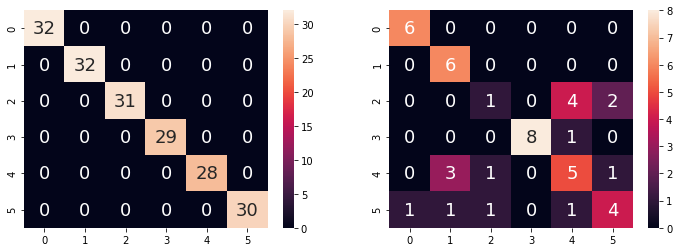

In [37]:
forest3 = random_tree_new(X_train2, X_test2, y_train, y_test)

0 	 Current account balance_Percent of GDP_average
1 	 General government net lending/borrowing_Percent of GDP_average
2 	 General government revenue_Percent of GDP_average
3 	 General government total expenditure_Percent of GDP_average
4 	 Gross domestic product per capita, current prices_U.S. dollars_average
5 	 Inflation, average consumer prices_Percent change_average
6 	 Population_Persons_average
7 	 Total investment_Percent of GDP_average
8 	 Gross national savings_Percent of GDP_average
9 	 Education Index_average


<AxesSubplot:xlabel='values', ylabel='features'>

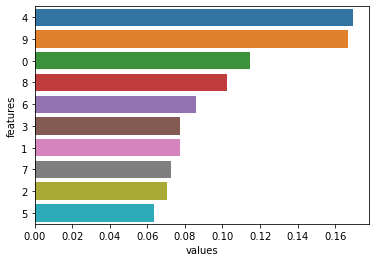

In [38]:
for i in range(len(X_train2.columns)):
        print (i, '\t', X_train2.columns[i])

sb.barplot(y="features", x="values", 
               data=forest3, 
               orient='h', 
              order = forest3.sort_values(by ='values', ascending = False).features)